# Summarising, Aggregating, and Grouping data in Python Pandas

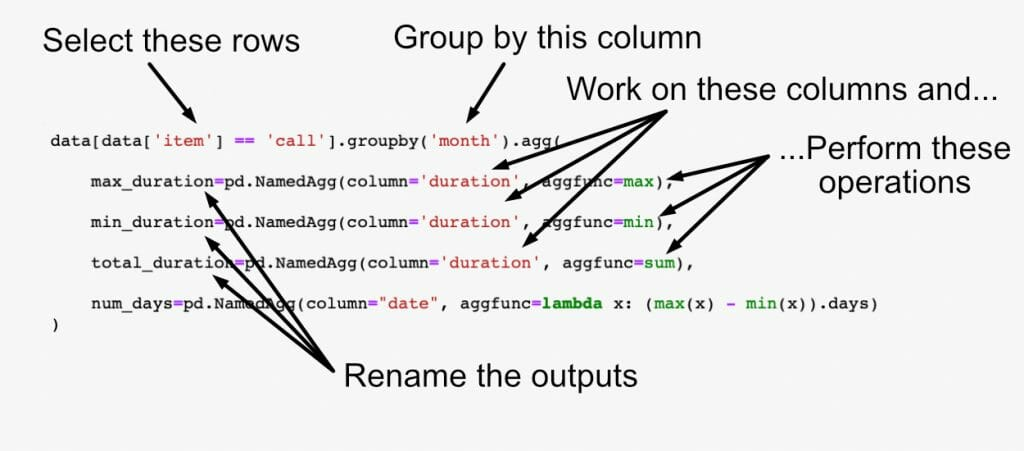

## Pandas – Python Data Analysis Library

I use Python's excellent Pandas library as a data analysis tool.

One aspect that often comes up in this task is grouping large data frames by different variables and applying summary functions to each group. This is accomplished in Pandas using the "groupby ()" and "agg ()" functions of Panda's DataFrame objects.

### A Sample DataFrame

In order to demonstrate the effectiveness and simplicity of the grouping commands, we will need some data. For an example dataset, I have a mobile phone usage records. we will analyse this type of data using Pandas. the full csv file is available at "./data/sample_data.csv".
The dataset contains 830 entries for mobile phone log spanning a total time of 5 months. The CSV file can be loaded into a pandas DataFrame using the pandas.DataFrame.from_csv() function.

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import dateutil
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read sample Data
df = pd.read_csv("./data/sample_data.csv")
df.head(10)

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,MTN,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Nexttel,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Camtel,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Camtel,mobile
5,5,15/10/14 18:55,4.000,call,2014-11,Camtel,mobile
6,6,16/10/14 06:58,34.429,data,2014-11,data,data
7,7,16/10/14 15:01,602.000,call,2014-11,Camtel,mobile
8,8,16/10/14 15:12,1050.000,call,2014-11,Camtel,mobile
9,9,16/10/14 15:30,19.000,call,2014-11,voicemail,voicemail


The main columns in the file are:

* *date :* The date and time of the entry
* *duration :* The duration (in seconds) for each call, the amount of data (in MB) for each data entry, and the number of texts sent (usually 1) for each sms entry.
* *item :* A description of the event occurring – can be one of call, sms, or data.
* *month :* The billing month that each entry belongs to – of form ‘YYYY-MM’.
* *network :* The mobile network that was called/texted for each entry.
* *network_type :* Whether the number being called was a mobile, international (‘world’), voicemail, landline, or other (‘special’) number.

Phone numbers were removed for privacy. The date column can be parsed using the extremely handy dateutil library.

In [3]:
df['date'] = df['date'].apply(dateutil.parser.parse, dayfirst=True)

## Summarising the DataFrame

Once the data has been loaded into Python, Pandas makes the calculation of different statistics very simple. For example, mean, max, min, standard deviations and more for columns are easily calculable:

In [4]:
# How many rows the dataset
df['item'].count()

830

In [5]:
# What was the longest phone call / data entry ?
df['duration'].max()

10528.0

In [6]:
# How many seconds of phone calls are recorded in total ?
df['duration'][df['item'] == 'call'].sum()

92321.0

In [7]:
# How many entries are there for each month?
df['month'].value_counts()

2014-11    230
2015-01    205
2014-12    157
2015-02    137
2015-03    101
Name: month, dtype: int64

In [8]:
# Number of non-null unique network entries
df['network'].nunique()

8

The need for custom functions is minimal unless you have very specific requirements. The full range of basic statistics that are quickly calculable and built into the base Pandas package are :

* *count :*	Number of non-null observations
* *sum :*	Sum of values
* *mean :*	Mean of values
* *mad :*	Mean absolute deviation
* *median :*	Arithmetic median of values
* *min :*	Minimum
* *max :*	Maximum
* *mode :*	Mode
* *abs :*	Absolute Value
* *prod :*	Product of values
* *std :*	Unbiased standard deviation
* *var :*	Unbiased variance
* *sem :*	Unbiased standard error of the mean
* *skew :*	Unbiased skewness (3rd moment)
* *kurt :*	Unbiased kurtosis (4th moment)
* *quantile :*	Sample quantile (value at %)
* *cumsum :*	Cumulative sum
* *cumprod :*	Cumulative product
* *cummax :*	Cumulative maximum
* *cummin :*	Cumulative minimum

The *describe()* function is a useful summarisation tool that will quickly display statistics for any variable or group it is applied to. The *describe()* output varies depending on whether you apply it to a numeric or character column.

## Summarising Groups in the DataFrame

There’s further power put into your hands by mastering the Pandas “groupby()” functionality. Groupby essentially splits the data into different groups depending on a variable of your choice. For example, the expression data.groupby(‘month’) will split our current DataFrame by month.

The groupby() function returns a GroupBy object, but essentially describes how the rows of the original data set has been split. the GroupBy object .groups variable is a dictionary whose keys are the computed unique groups and corresponding values being the axis labels belonging to each group. For example:

In [9]:
df.groupby(['month']).groups.keys()

dict_keys(['2014-11', '2014-12', '2015-01', '2015-02', '2015-03'])

In [10]:
len(df.groupby(['month']).groups['2014-11'])

230

Functions like max(), min(), mean(), first(), last() can be quickly applied to the GroupBy object to obtain summary statistics for each group – an immensely useful function. Different variables can be excluded / included from each summary requirement.

In [11]:
# Get the first entry for each month
df.groupby('month').first()

,index,date,duration,item,network,network_type
month,,,,,,
2014-11,0,2014-10-15 06:58:00,34.429,data,data,data
2014-12,228,2014-11-13 06:58:00,34.429,data,data,data
2015-01,381,2014-12-13 06:58:00,34.429,data,data,data
2015-02,577,2015-01-13 06:58:00,34.429,data,data,data
2015-03,729,2015-02-12 20:15:00,69.000,call,landline,landline


In [12]:
# Get the sum of the durations per month
df.groupby('month')['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [13]:
# Get the number of dates / entries in each month
df.groupby('month')['date'].count()

month
2014-11    230
2014-12    157
2015-01    205
2015-02    137
2015-03    101
Name: date, dtype: int64

In [14]:
# What is the sum of durations, for calls only, to each network
df[df['item'] == 'call'].groupby('network')['duration'].sum()

network
Camtel       50292.0
MTN          14621.0
Nexttel       7200.0
landline     18433.0
voicemail     1775.0
Name: duration, dtype: float64

We can also group by more than one variable, allowing more complex queries.

In [15]:
# How many calls, sms, and data entries are in each month?
df.groupby(['month', 'item'])['date'].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: date, dtype: int64

In [16]:
# How many calls, texts, and data are sent per month, split by network_type ?
df.groupby(['month', 'network_type'])['date'].count()

month    network_type
2014-11  data             29
         landline          5
         mobile          189
         special           1
         voicemail         6
2014-12  data             30
         landline          7
         mobile          108
         voicemail         8
         world             4
2015-01  data             31
         landline         11
         mobile          160
         voicemail         3
2015-02  data             31
         landline          8
         mobile           90
         special           2
         voicemail         6
2015-03  data             29
         landline         11
         mobile           54
         voicemail         4
         world             3
Name: date, dtype: int64

## Groupby output format – Series or DataFrame?

The output from a groupby and aggregation operation varies between Pandas Series and Pandas Dataframes, which can be confusing for new users. As a rule of thumb, if you calculate more than one column of results, your result will be a Dataframe. For a single column of results, the agg function, by default, will produce a Series.

We can change this by selecting our operation column differently:

In [17]:
# produces Pandas Series
df.groupby('month')['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [18]:
# Produces Pandas DataFrame
df.groupby('month')[['duration']].sum()

,duration
month,
2014-11,26639.441
2014-12,14641.870
2015-01,18223.299
2015-02,15522.299
2015-03,22750.441


The groupby output will have an index or multi-index on rows corresponding to your chosen grouping variables. To avoid setting this index, pass “as_index=False” to the groupby operation.

In [19]:
df.groupby('month', as_index=False).agg({"duration": "sum"})

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


Using the as_index parameter while Grouping data in pandas prevents setting a row index on the result.

## Multiple Statistics per Group

The final piece of syntax that we’ll examine is the “agg()” function for Pandas. The aggregation functionality provided by the agg() function allows multiple statistics to be calculated per group in one calculation.

### Applying a single function to columns in groups

Instructions for aggregation are provided in the form of a python dictionary or list. The dictionary keys are used to specify the columns upon which you’d like to perform operations, and the dictionary values to specify the function to run.

For example:

In [20]:
# Group the data frame by month and item and extract a number of stats from each group
df.groupby(
   ['month', 'item']
).agg(
    {
         'duration':sum,    # Sum duration per group
         'network_type': "count",  # get the count of networks
         'date': 'first'  # get the first date per group
    }
)

duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

The aggregation dictionary syntax is flexible and can be defined before the operation. You can also define functions inline using “lambda” functions to extract statistics that are not provided by the built-in options.

In [21]:
# Define the aggregation procedure outside of the groupby operation
aggregations = {
    'duration':'sum',
    'date': lambda x: max(x)
}
df.groupby('month').agg(aggregations)

,duration,date
month,,
2014-11,26639.441,2014-11-13 22:31:00
2014-12,14641.870,2014-12-14 19:54:00
2015-01,18223.299,2015-01-14 23:36:00
2015-02,15522.299,2015-02-12 06:58:00
2015-03,22750.441,2015-03-14 00:16:00


### Applying multiple functions to columns in groups

To apply multiple functions to a single column in your grouped data, expand the syntax above to pass in a list of functions as the value in your aggregation dataframe. See below :

In [22]:
# Group the data frame by month and item and extract a number of stats from each group
df.groupby(
    ['month', 'item']
).agg(
    {
        # Find the min, max, and sum of the duration column
        'duration': [min, max, sum],
        # find the number of network type entries
        'network_type': "count",
        # minimum, first, and number of unique dates
        'date': [min, 'first', 'nunique']
    }
)

duration                       network_type                date  \
                  min        max        sum        count                 min   
month   item                                                                   
2014-11 call    1.000   1940.000  25547.000          107 2014-10-15 06:58:00   
        data   34.429     34.429    998.441           29 2014-10-15 06:58:00   
        sms     1.000      1.000     94.000           94 2014-10-16 22:18:00   
2014-12 call    2.000   2120.000  13561.000           79 2014-11-14 17:24:00   
        data   34.429     34.429   1032.870           30 2014-11-13 06:58:00   
        sms     1.000      1.000     48.000           48 2014-11-14 17:28:00   
2015-01 call    2.000   1859.000  17070.000           88 2014-12-15 20:03:00   
        data   34.429     34.429   1067.299           31 2014-12-13 06:58:00   
        sms     1.000      1.000     86.000           86 2014-12-15 19:56:00   
2015-02 call    1.000   1863.000  14416.000           67 2015-01-15 10:36:00   
        data   34.429     34.429   1067.299           31 2015-01-13 06:58:00   
        sms     1.000      1.000     39.000           39 2015-01-15 12:23:00   
2015-03 call    2.000  10528.000  21727.000           47 2015-02-12 20:15:00   
        data   34.429     34.429    998.441           29 2015-02-13 06:58:00   
        sms     1.000      1.000     25.000           25 2015-02-19 18:46:00   

                                          
                           first nunique  
month   item                              
2014-11 call 2014-10-15 06:58:00     104  
        data 2014-10-15 06:58:00      29  
        sms  2014-10-16 22:18:00      79  
2014-12 call 2014-11-14 17:24:00      76  
        data 2014-11-13 06:58:00      30  
        sms  2014-11-14 17:28:00      41  
2015-01 call 2014-12-15 20:03:00      84  
        data 2014-12-13 06:58:00      31  
        sms  2014-12-15 19:56:00      58  
2015-02 call 2015-01-15 10:36:00      67  
        data 2015-01-13 06:58:00      31  
        sms  2015-01-15 12:23:00      27  
2015-03 call 2015-02-12 20:15:00      47  
        data 2015-02-13 06:58:00      29  
        sms  2015-02-19 18:46:00      17

The agg(..) syntax is flexible and simple to use. Remember that you can pass in custom and lambda functions to your list of aggregated calculations, and each will be passed the values from the column in your grouped data.

### Renaming grouped aggregation columns

We’ll examine two methods to group Dataframes and rename the column results in your work.

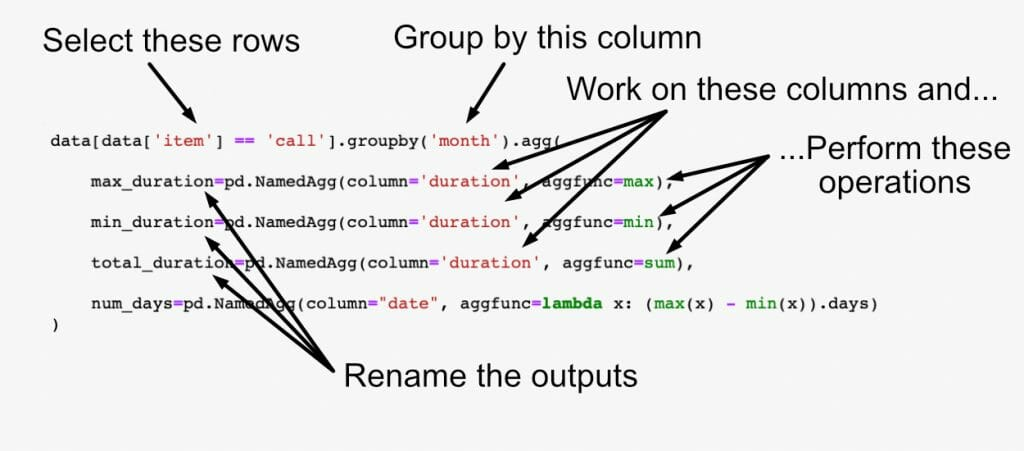

Grouping, calculating, and renaming the results can be achieved in a single command using the “agg” functionality in Python. A “pd.NamedAgg” is used for clarity, but normal tuples of form (column_name, grouping_function) can also be used also.

### Recommended: Tuple Named Aggregations

Introduced in Pandas 0.25.0, groupby aggregation with relabelling is supported using “named aggregation” with simple tuples. Python tuples are used to provide the column name on which to work on, along with the function to apply.

For example:

In [23]:
df[df['item'] == 'call'].groupby('month').agg(
    # Get max of the duration column for each group
    max_duration=('duration', max),
    # Get min of the duration column for each group
    min_duration=('duration', min),
    # Get sum of the duration column for each group
    total_duration=('duration', sum),
    # Apply a lambda to date column
    num_days=("date", lambda x: (max(x) - min(x)).days)    
)

,max_duration,min_duration,total_duration,num_days
month,,,,
2014-11,1940.0,1.0,25547.0,28
2014-12,2120.0,2.0,13561.0,30
2015-01,1859.0,2.0,17070.0,30
2015-02,1863.0,1.0,14416.0,25
2015-03,10528.0,2.0,21727.0,19


Grouping with named aggregation using new Pandas 0.25 syntax. Tuples are used to specify the columns to work on and the functions to apply to each grouping.

For clearer naming, Pandas also provides the NamedAggregation named-tuple, which can be used to achieve the same as normal tuples:

In [24]:
df[df['item'] == 'call'].groupby('month').agg(
    max_duration=pd.NamedAgg(column='duration', aggfunc=max),
    min_duration=pd.NamedAgg(column='duration', aggfunc=min),
    total_duration=pd.NamedAgg(column='duration', aggfunc=sum),
    num_days=pd.NamedAgg(
        column="date", 
        aggfunc=lambda x: (max(x) - min(x)).days)    
)

,max_duration,min_duration,total_duration,num_days
month,,,,
2014-11,1940.0,1.0,25547.0,28
2014-12,2120.0,2.0,13561.0,30
2015-01,1859.0,2.0,17070.0,30
2015-02,1863.0,1.0,14416.0,25
2015-03,10528.0,2.0,21727.0,19


Note that in versions of Pandas after release, applying lambda functions only works for these named aggregations when they are the only function applied to a single column, otherwise causing a KeyError.

### Renaming index using droplevel and ravel

When multiple statistics are calculated on columns, the resulting dataframe will have a multi-index set on the column axis. The multi-index can be difficult to work with, and I typically have to rename columns after a groupby operation.

One option is to drop the top level (using .droplevel) of the newly created multi-index on columns using:

In [25]:
grouped = df.groupby('month').agg({"duration": [min, max, "mean"]})
grouped.columns = grouped.columns.droplevel(level=0)
grouped.rename(columns={
    "min": "min_duration", "max": "max_duration", "mean": "mean_duration"
})
grouped.head()

,min,max,mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


However, this approach loses the original column names, leaving only the function names as column headers. A neater approach, is using the ravel() method on the grouped columns. Ravel() turns a Pandas multi-index into a simpler array, which we can combine into sensible column names:

In [26]:
grouped = df.groupby('month').agg({"duration": [min, max, "mean"]}) 
# Using ravel, and a string join, we can create better names for the columns:
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
grouped.head()

,duration_min,duration_max,duration_mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


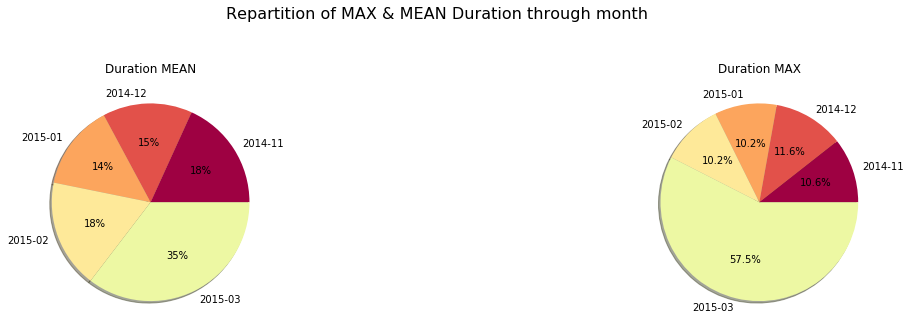

In [27]:
from matplotlib.gridspec import GridSpec

month = grouped.index
duration_max = grouped.duration_max
duration_mean = grouped.duration_mean

# Make square figures and axes
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]


plt.subplot(the_grid[0, 1], aspect=1, title='Duration MAX')

source_pie = plt.pie(duration_max, labels=month, autopct='%1.1f%%', shadow=True, colors=colors)


plt.subplot(the_grid[0, 0], aspect=1, title='Duration MEAN')

source_1_pie = plt.pie(duration_mean,labels=month, autopct='%.0f%%', shadow=True, colors=colors)

plt.suptitle('Repartition of MAX & MEAN Duration through month', fontsize=16)


plt.show()

Quick renaming of grouped columns from the groupby() multi-index can be achieved using the ravel() function.

### *DEPRECATED* Dictionary groupby format

*There were substantial changes to the Pandas aggregation function in May of 2017. Renaming of variables using dictionaries within the agg() function as in the diagram below is being deprecated/removed from Pandas – see notes.*

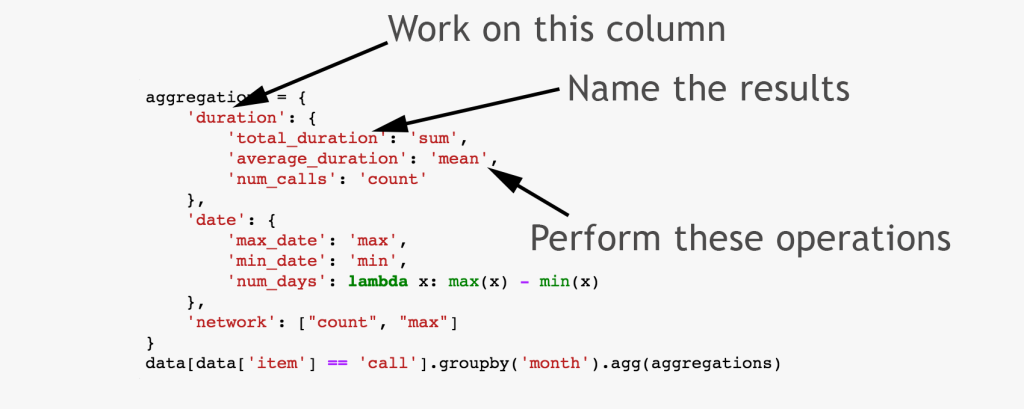

Aggregation of variables in a Pandas Dataframe using the agg() function. Note that in Pandas versions 0.20.1 onwards, the renaming of results needs to be done separately.

In older Pandas releases (< 0.20.1), renaming the newly calculated columns was possible through nested dictionaries, or by passing a list of functions for a column. Our final example calculates multiple values from the duration column and names the results appropriately. Note that the results have multi-indexed column headers.

#### Note this syntax will no longer work for new installations of Python Pandas.

In [28]:
# Define the aggregation calculations
aggregations = {
    # work on the "duration" column
    'duration': { 
        # get the sum, and call this result 'total_duration'
        'total_duration': 'sum',  
        # get mean, call result 'average_duration'
        'average_duration': 'mean', 
        'num_calls': 'count'
    },
    # Now work on the "date" column
    'date': {     
        # Find the max, call the result "max_date" 
        'max_date': 'max',           
        'min_date': 'min',
        # Calculate the date range per group
        'num_days': lambda x: max(x) - min(x)  
    },
     # Calculate two results for the 'network' column with a list
    'network': ["count", "max"] 
}
# Perform groupby aggregation by "month", 
# but only on the rows that are of type "call"
df[df['item'] == 'call'].groupby('month').agg(aggregations)

duration                                           date  \
        total_duration average_duration num_calls            max_date   
month                                                                   
2014-11        25547.0       238.757009       107 2014-11-12 19:01:00   
2014-12        13561.0       171.658228        79 2014-12-14 19:54:00   
2015-01        17070.0       193.977273        88 2015-01-14 20:47:00   
2015-02        14416.0       215.164179        67 2015-02-09 17:54:00   
2015-03        21727.0       462.276596        47 2015-03-04 12:29:00   

                                             network             
                   min_date         num_days   count        max  
month                                                            
2014-11 2014-10-15 06:58:00 28 days 12:03:00     107  voicemail  
2014-12 2014-11-14 17:24:00 30 days 02:30:00      79  voicemail  
2015-01 2014-12-15 20:03:00 30 days 00:44:00      88  voicemail  
2015-02 2015-01-15 10:36:00 25 days 07:18:00      67  voicemail  
2015-03 2015-02-12 20:15:00 19 days 16:14:00      47  voicemail

## Wrap up

The groupby functionality in Pandas is well documented in the official docs.

There are plenty of resources online on this functionality, and I’d recommomend really conquering this syntax if you’re using Pandas in earnest at any point.

* *DataQuest Tutorial on Data* 
   Analysis: https://www.dataquest.io/blog/pandas-tutorial-python-2/
* *Chris Albon notes on*
   Groups: https://chrisalbon.com/python/pandas_apply_operations_to_groups.html
* *Greg Reda Pandas* 
   Tutorial: http://www.gregreda.com/2013/10/26/working-with-pandas-dataframes/